## Observations and Insights

## Dependencies and starter code

In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
Combined_Results = pd.merge(mouse_metadata, study_results, on="Mouse ID", how = "outer")
Combined_Results = Combined_Results.dropna()
Combined_Results.head(15)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


## Summary statistics

In [2]:
Combined_Results["Tumor Volume (mm3)"].mean()
st.mode(Combined_Results["Tumor Volume (mm3)"])
#How come this works, but not with a groupby object?

ModeResult(mode=array([45.]), count=array([250]))

In [19]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
Information_Table=pd.DataFrame()
Drug_List= Combined_Results.groupby("Drug Regimen")["Tumor Volume (mm3)"]

# Mean
Information_Table["Mean"]=Drug_List.mean()

# Median
Information_Table["Median"]= Drug_List.median()

# Finding Mode because scipy.stats.mode doesn't work with series objects
Mode_List = Drug_List.value_counts()
Mode_List = Drug_List.apply(lambda x: x.mode())
    # Not sure I understand lambda function. Takes the function as input x, and the space after : is the action.
    # .apply would allow me to use the groupby object and use it in the lambda function.
    # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html
    # https://github.com/pandas-dev/pandas/issues/13809
# Clean up to merge mode list into the information table
Information_Table = pd.merge(Information_Table,Mode_List, on="Drug Regimen")
Information_Table = Information_Table.rename(columns={"Tumor Volume (mm3)":"Mode"})

# Variance
Information_Table["Variance"]=Drug_List.var()

# Standard Error of Mean
Information_Table["SEM"] = Drug_List.sem()

# Output
Information_Table


,Mean,Median,Mode,Variance,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,45.0,24.947764,0.329346
Ceftamin,52.591172,51.776157,45.0,39.290177,0.469821
Infubinol,52.884795,51.820584,45.0,43.128684,0.492236
Ketapril,55.235638,53.698743,45.0,68.553577,0.603860
Naftisol,54.331565,52.509285,45.0,66.173479,0.596466
Placebo,54.033581,52.288934,45.0,61.168083,0.581331
Propriva,52.322552,50.854632,45.0,42.351070,0.512884
Ramicane,40.216745,40.673236,45.0,23.486704,0.320955
Stelasyn,54.233149,52.431737,45.0,59.450562,0.573111


## Bar plots

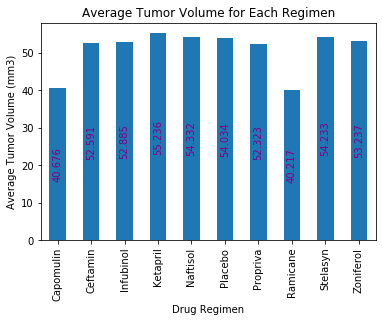

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
PandasPlot = Information_Table["Mean"].plot(kind="bar",title = "Average Tumor Volume for Each Regimen")
PandasPlot.set_ylabel("Average Tumor Volume (mm3)")

# https://stackoverflow.com/questions/30228069/how-to-display-the-value-of-the-bar-on-each-bar-with-pyplot-barh
    # Found this example here, it was helpful to tell me I am getting a different number.
    # Plus, it looks nice, kinda.
for i in range(len(Information_Table.index)):
    plt.text(i,Information_Table["Mean"][i]/2,str(round(Information_Table["Mean"][i],3)), rotation = "vertical", color="purple",
             verticalalignment = "center", horizontalalignment = "center")



([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

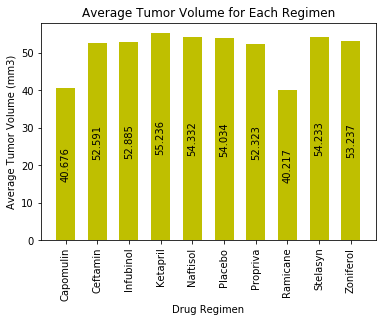

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
plt.bar(Information_Table.index,Information_Table["Mean"], width=0.6,color="y")
plt.title("Average Tumor Volume for Each Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Average Tumor Volume (mm3)")

for i in range(len(Information_Table.index)):
    plt.text(i,Information_Table["Mean"][i]/2,str(round(Information_Table["Mean"][i],3)), rotation = "vertical",
            verticalalignment = "center", horizontalalignment = "center")


plt.xticks(rotation = 90) 

## Pie plots

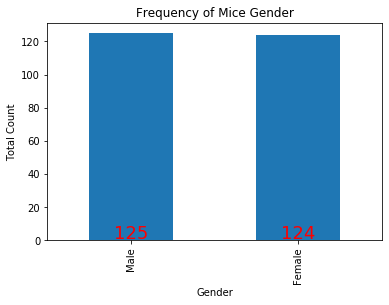

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# Grab only Mouse ID and gender
Genderless_Mice = Combined_Results.loc[:,["Mouse ID","Sex"]]

# Group them by Mouse ID
Genderless_Mice = Genderless_Mice.groupby("Mouse ID")

#Gets gender count
Genderless_Mice = Genderless_Mice.describe()["Sex"]["top"].value_counts()

#Plot with Pandas, bar graph
Genderless_Mice_Plot = Genderless_Mice.plot(kind = "bar",title="Frequency of Mice Gender")
Genderless_Mice_Plot.set_xlabel("Gender")
Genderless_Mice_Plot.set_ylabel("Total Count")

# Gets the number count and prints it to the respective bar
for i, Y_Values in enumerate((Genderless_Mice)):
    plt.text(i,Y_Values/Y_Values, str(Y_Values), color = "red", fontsize = 18, horizontalalignment = "center")


Text(0.5, 0, 'Gender')

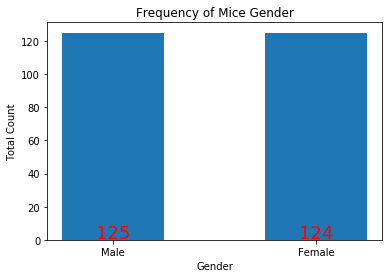

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#Plot with PyPlot
plt.bar(Genderless_Mice.index,Genderless_Mice[0],width = 0.5)

# Gets value of each gender and prints out the number in the respective bar.
for i, Y_Values in enumerate((Genderless_Mice)):
    plt.text(i,Y_Values/Y_Values, str(Y_Values), color = "red", fontsize = 18,horizontalalignment="center")

#Set title and labels    
plt.title("Frequency of Mice Gender")
plt.ylabel("Total Count")
plt.xlabel("Gender")



## Quartiles, outliers and boxplots

In [8]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.

# Creates a list of number to indicate which row is the end of one mouse's data
Final_Tumor_Index = []
# Creates a list of the original column names to add to the final result.
Columns = Combined_Results.columns

# Goes through the list of data, finds the last row of each Mouse ID.
for i in range(len(Combined_Results)-1):
    if(Combined_Results.loc[i,"Mouse ID"] != Combined_Results.loc[i+1,"Mouse ID"]):
        Final_Tumor_Index.append(i)

# Using the list of last row IDs, use the original data, and grab only the last rows of each ID
Final_Tumor_DF = Combined_Results.loc[Final_Tumor_Index,:]

# This is for getting the last of the last. The index runs out and can't check next index for the last row.
Final_Tumor_DF = Final_Tumor_DF.append(Combined_Results.loc[len(Combined_Results)-1])

# Using Infomration_Table from summary statistics, sort the 10 drug regimen from best to worst on average.
Information_Table = Information_Table.sort_values(by=["Mean"])

# Create a list of the top 4 regimen
Top_4_Regimen = Information_Table.iloc[0:4,:].index

# Create a list of the last 6 regimen. It was easier to erase than to add.
Least_Effective_Regimen = Information_Table.iloc[4:len(Information_Table),:].index

# Goes through the list of the last 6 regimen, using the Final Tumor Dataframe, delete the ones that are not top 4.
for i in Least_Effective_Regimen:
    Final_Tumor_DF = Final_Tumor_DF[Final_Tumor_DF["Drug Regimen"] != i]

# Gets the details for each of the top 4 regimens individually.
First_Place_Regimen = Final_Tumor_DF[Final_Tumor_DF["Drug Regimen"] == Top_4_Regimen[0]]
Second_Place_Regimen = Final_Tumor_DF[Final_Tumor_DF["Drug Regimen"] == Top_4_Regimen[1]]
Third_Place_Regimen = Final_Tumor_DF[Final_Tumor_DF["Drug Regimen"] == Top_4_Regimen[2]]
Fourth_Place_Regimen = Final_Tumor_DF[Final_Tumor_DF["Drug Regimen"] == Top_4_Regimen[3]]

# Put the list in the list
RegimenList = [First_Place_Regimen,Second_Place_Regimen,Third_Place_Regimen,Fourth_Place_Regimen]

# Created a function to find IQR, median, lower boundary, upper boundary, lower quantile, and upper quantile
# Also returns whether or not the regimen have any outliers in it.
def GetOutlierBoundaries(Frame):
    Frame_Tumor_Volume = Frame["Tumor Volume (mm3)"]
    Frame_Median = Frame_Tumor_Volume.median()
    (Lower_Quantile, Higher_Quantile) = Frame_Tumor_Volume.quantile([0.25,0.75])
    IQR = Higher_Quantile-Lower_Quantile
    Lower_Boundary = Lower_Quantile - (1.5*IQR)
    Higher_Boundary = Higher_Quantile + (1.5*IQR)
    
    output = [IQR,Frame_Median,Lower_Boundary,Higher_Boundary,Lower_Quantile,Higher_Quantile]
    # Goes through each number in the regimen list, and finds a outlier. If there is even 1, then it returns True.
    for i in Frame_Tumor_Volume:
        if i > Higher_Boundary or i < Lower_Boundary:
            return [output, True]
    return [output,False]

# Created BoxPlot_Details to store boxplot details
BoxPlot_Details = []

# For each Regimen in the top 4 list, run the function created above.
# If there is outliers, then print out "There are outliers in _______ trial."
# If no outliers, then print "There are no outliers in _______ trial."
for i in RegimenList:
    BoxPlot = GetOutlierBoundaries(i)
    if(BoxPlot[-1]):        
        print(f"There are outliers in {i.iloc[1,1]} trial.")
    else:
        print(f"There are no outliers in {i.iloc[1,1]} trial.")
    BoxPlot_Details.append(BoxPlot)


There are no outliers in Ramicane trial.
There are no outliers in Capomulin trial.
There are no outliers in Propriva trial.
There are no outliers in Ceftamin trial.


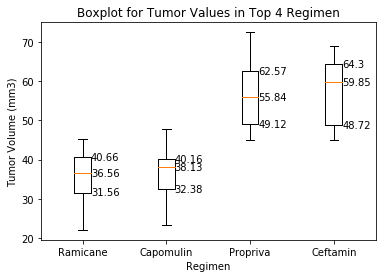

In [9]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot([First_Place_Regimen["Tumor Volume (mm3)"],Second_Place_Regimen["Tumor Volume (mm3)"],
            Third_Place_Regimen["Tumor Volume (mm3)"],Fourth_Place_Regimen["Tumor Volume (mm3)"]],
           widths = 0.2,
           showfliers = True)
# Create title, labels, and replaces the ticks with the regimen name.
plt.title("Boxplot for Tumor Values in Top 4 Regimen")
plt.xticks([1,2,3,4],Top_4_Regimen)
plt.xlabel("Regimen")
plt.ylabel("Tumor Volume (mm3)")

# Using the information I gathered, print out median, lower quantile, and upper quantile to their respective spots
for i in range(len(BoxPlot_Details)):
    plt.text(i+1.1, BoxPlot_Details[i][0][1],str(round(BoxPlot_Details[i][0][1],2)), verticalalignment = "center")
    plt.text(i+1.1, BoxPlot_Details[i][0][4],str(round(BoxPlot_Details[i][0][4],2)), verticalalignment = "center")
    plt.text(i+1.1, BoxPlot_Details[i][0][5],str(round(BoxPlot_Details[i][0][5],2)), verticalalignment = "center")
    
    

## Line and scatter plots

Text(0.5, 1.0, 'Example of Tumor for Subject s185')

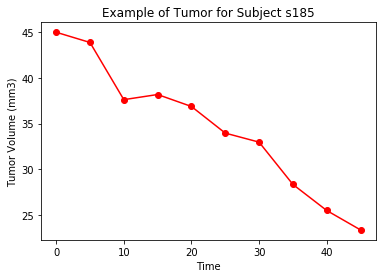

In [10]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# Created a list of results only for Capomulin trial
Capomulin = Combined_Results[Combined_Results["Drug Regimen"]=="Capomulin"]

# Instruction said any one mouse, so I grabbed the first mouse.
Subject_ID = Capomulin.iloc[1,:]["Mouse ID"]

# Using the ID of the first mouse, take all data relevant to the first mouse
Capomulin_Example = Capomulin[Capomulin["Mouse ID"]==Subject_ID]

# Created x axis data with the time of each data.
Time_Capomulin_Example = Capomulin_Example["Timepoint"]

# Created y axis data with the Tumor volume (mm3)
Tumor_Volume_Capomulin_Example = Capomulin_Example["Tumor Volume (mm3)"]

#plot Tumor Volume vs Time.
plt.plot(Time_Capomulin_Example,Tumor_Volume_Capomulin_Example, marker="o", color="r")

#Labels and titles.
plt.xlabel("Time")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Example of Tumor for Subject {Subject_ID}")


Text(0, 0.5, 'Average Tumor Volume (mm3)')

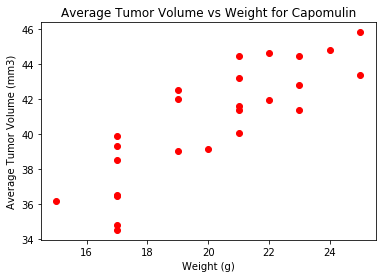

In [11]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# Using the Capomulin information from before, create a summary of the results.
Capomulin_Details = Capomulin.groupby("Mouse ID").describe()

# Grab the weight of each subject for x axis. It's all the same so the average should make it the same.
Capomulin_Weight = Capomulin_Details["Weight (g)"]["mean"]

# Grab the average tumor volume of each subject for y axis.
Capomulin_Tumor_Volume = Capomulin_Details["Tumor Volume (mm3)"]["mean"]

# Plot Tumor Volume vs Weight
plt.scatter(Capomulin_Weight,Capomulin_Tumor_Volume,color="r")

# Titles and labels.
plt.title("Average Tumor Volume vs Weight for Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")


Text(18, 35, 'R² = 0.84')

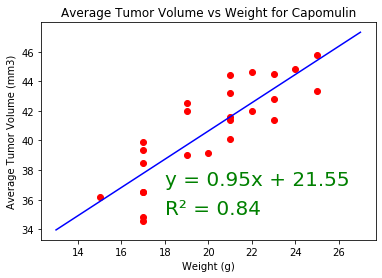

In [12]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

# Find the slope, intercept, correlation coefficient, p-value and standard error using linregress from scipy.stats
(slope,intercept, Corr_Coefficient, p, stderr) = st.linregress(Capomulin_Weight,Capomulin_Tumor_Volume)

# Write the equation for best fit line.
Equation = f"y = {round(slope,2)}x + {round(intercept,2)}"

# Make a x and y axis to draw the line onto the graph.
xline = np.arange(min(Capomulin_Weight)-2,max(Capomulin_Weight)+2,0.01)
yline = (slope*xline) + intercept

# Plot the same graph as before
#----------------------------------------------------------------
plt.scatter(Capomulin_Weight,Capomulin_Tumor_Volume,color="r")
plt.title("Average Tumor Volume vs Weight for Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
#----------------------------------------------------------------

# Plot the line to show line of best fit.
plt.plot(xline,yline,'b-')

# Placed the equation on the graph where I saw would be least intrusive.
plt.annotate(Equation,(18,37),fontsize=20,color="green")

# Placed the correlation coefficient on the graph where I saw would be least intrusive.
plt.annotate(f"R² = {round(Corr_Coefficient,2)}",(18,35),fontsize=20,color="green")